In [103]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [104]:
# mnistをDL
mnist = fetch_mldata("MNIST original", data_home="./data")

(70000L, 784L)


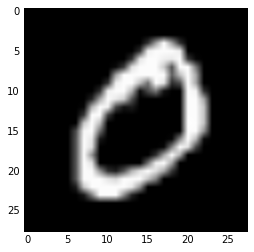

In [105]:
# データをロード
x = mnist.data
y = mnist.target
x = x.astype(np.float32)
y = y.astype(np.int32)

# 内容を確認
print x.shape # (700000, 784) => 28x28(784)の画像が70000枚
plt.imshow(x[0].reshape((28,28)), cmap=plt.cm.gray) # (28, 28)に変換してグレースケールで表示
plt.show()

In [106]:
# 輝度を揃える
x /= x.max()

In [107]:
#データを「学習データ:テストデータ=9:1」に分ける
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [108]:
model = KMeans(init='k-means++', n_clusters=10)

In [109]:
model.fit(x_train) # 教師なし学習だからy_trainはいらない

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [110]:
y_pred = model.predict(x_test)

In [111]:
category_dict = dict([(x, str(x)) for x in range(10)])

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(category_dict))
    plt.xticks(tick_marks, category_dict, rotation=45)
    plt.yticks(tick_marks, category_dict)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 32   1   0 556   1  25   3  69   2   3]
 [  2 381 431   0   0   1   0   0   0   0]
 [ 34  47  34   3  24  18   8  17 501   4]
 [463  11  45   1   7   5   7 169  23  23]
 [  0  21  11   0 257  11 193   1   5 209]
 [184  73  17   6  25  14  41 233   1  32]
 [  3  21  35   7  31 537   0  26   7   1]
 [  0  32  26   0  71   0 289   0   2 272]
 [152  47  34   3  19   6  25 379   5  20]
 [  8  10  12   5 151   1 173   6   0 299]]


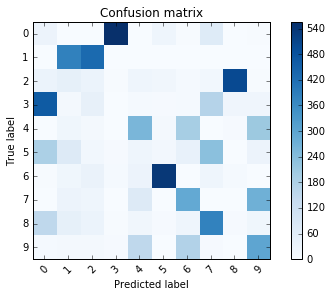

In [112]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

('target id', 4527)


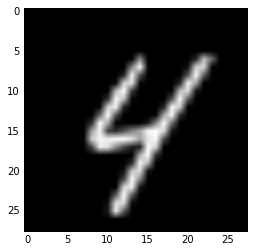

('predict label :', array([6]))


In [113]:
target = np.random.randint(x_test.shape[0])
print ("target id", target)
plt.imshow(x_test[target].reshape((28,28)), cmap=plt.cm.gray) # (28, 28)に変換してグレースケールで表示
plt.show()

pred = model.predict([x_test[target]])
print ("predict label :", pred)